## Importing all the necessary libraries


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

## Reading all the csv files of albedo and chemical composition as a Dataframe

In [4]:
albedo = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Moon/Albedo_Map.csv',header=None)

In [5]:
fe = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Moon/LPFe_Map.csv',header=None)

In [6]:
k = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Moon/LPK_Map.csv',header=None)

In [7]:
th = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Moon/LPTh_Map.csv',header=None)

In [8]:
ti = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Moon/LPTi_Map.csv',header=None)

## Now we will split the image into two halves and reshape them to column vector. 

In [9]:
def splitAndReshape(data):
  half = 360
  train,test = data.iloc[:,:half] , data.iloc[:,half:]
  trainColumnVector , testColumnVector = train.values.reshape(-1,1), test.values.reshape(-1,1)

  return trainColumnVector , testColumnVector


In [10]:
albedoTrain, albedoTest = splitAndReshape(albedo)

In [11]:
feTrain , feTest = splitAndReshape(fe)

In [12]:
kTrain , kTest = splitAndReshape(k)

In [13]:
thTrain , thTest = splitAndReshape(th)

In [14]:
tiTrain , tiTest = splitAndReshape(ti)

## Now we will concate column vector of each dataframw where each row represents the pixel values of the image accordingly

In [16]:
dataTrain = np.concatenate([feTrain,kTrain,thTrain,tiTrain,albedoTrain], axis=1)

In [18]:
dataTest = np.concatenate([feTest,kTest,thTest,tiTest,albedoTest],axis=1)

## The features will be the pixel values of the chemical composition and the target variable will be the brigtness of each pixel in the albedo map

In [19]:
Xtrain,Xtest = dataTrain[:,:-1],dataTest[:,:-1]

In [20]:
Xtrain.shape

(129600, 4)

In [21]:
ytrain,ytest = dataTrain[:,-1].reshape(-1,1) , dataTest[:,-1].reshape(-1,1)

In [22]:
ytrain.shape

(129600, 1)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
from xgboost import XGBRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

## Now we will train various regression models on the chemical composition data to predict the pixel values of albedo. We will then reshape the column vector to 360x360 so that we can plot the predicted image

In [27]:
def results(model):
  model.fit(Xtrain,ytrain)
  prediction = model.predict(Xtest)
  image = prediction.reshape(360,360)

  return prediction,image

In [28]:
lr  =  LinearRegression()
dt  =  DecisionTreeRegressor()
xgb =  XGBRegressor()
rf  =  RandomForestRegressor()

In [29]:
lrPrediction , lrImage = results(lr)

In [30]:
dtPrediction, dtImage = results(dt)

In [31]:
xgbPrediction, xgbImage = results(xgb)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[09:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
rfPrediction, rfImage = results(rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [33]:
import sklearn.metrics as skmetrics

## We are choosing Root Mean Squared Error to quantify the measurement of performance of each model

In [34]:
def rmse(prediction,actual):
  error = skmetrics.mean_squared_error(prediction, actual, squared = False)

  return error

In [50]:
lrError = rmse(lrPrediction,albedoTest)
lrError

0.03201506414975387

In [51]:
dtError = rmse(dtPrediction,albedoTest)
dtError

0.04087903609505089

In [52]:
xgbError = rmse(xgbPrediction,albedoTest)
xgbError

0.03089871895457188

In [53]:
rfError = rmse(rfPrediction,albedoTest)
rfError

0.03421391254558764

In [39]:
testImage = albedo.iloc[:,360:]

## Now we will plot the right half of the albedo and also the predicted right half of albedo from each model

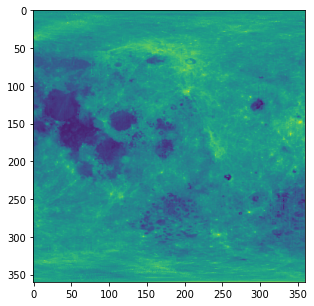

In [40]:
fig = plt.figure(figsize=(5,5))
plt.imshow(testImage)

Text(0.5, 1.0, 'Random Forest')

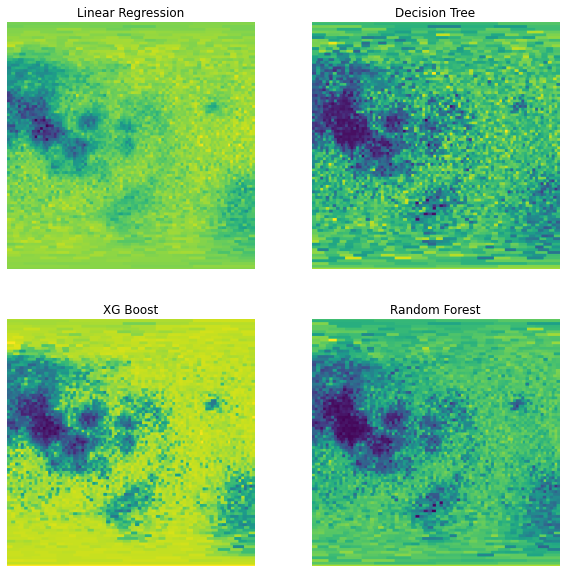

In [54]:
fig = plt.figure(figsize=(10,10))
rows = 2
columns = 2
  

Image1 = lrImage
Image2 = dtImage
Image3 = xgbImage
Image4 = rfImage
  

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title("Linear Regression")
  

fig.add_subplot(rows, columns, 2)
  

plt.imshow(Image2)
plt.axis('off')
plt.title("Decision Tree")
  

fig.add_subplot(rows, columns, 3)
  

plt.imshow(Image3)
plt.axis('off')
plt.title("XG Boost")
  

fig.add_subplot(rows, columns, 4)
  

plt.imshow(Image4)
plt.axis('off')
plt.title("Random Forest")

## We will define a function to find the difference in the pixel values between the predicted image and the actual image

In [42]:
def difference(predictedImage,actualImage):
  diff = predictedImage - actualImage

  return diff


In [43]:
lrDifference = difference(lrImage,testImage)
dtDifference = difference(dtImage,testImage)
xgbDifference = difference(xgbImage,testImage)
rfDifference = difference(rfImage,testImage)

Text(0.5, 1.0, 'Random Forest')

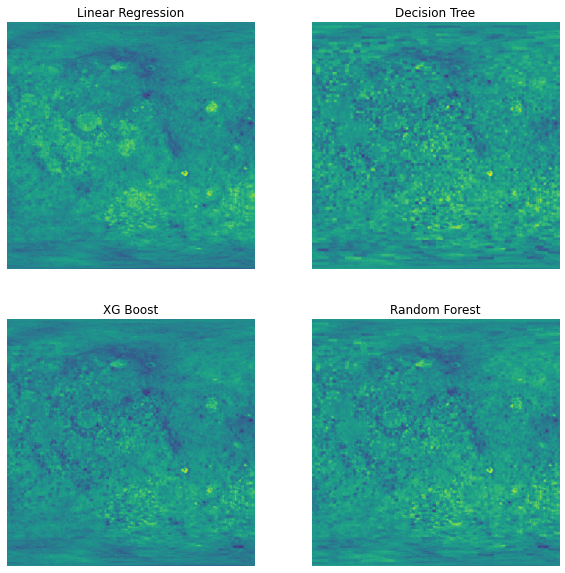

In [55]:
fig = plt.figure(figsize=(10,10))
rows = 2
columns = 2
  

Image1 = lrDifference
Image2 = dtDifference
Image3 = xgbDifference
Image4 = rfDifference
  

fig.add_subplot(rows, columns, 1)
  

plt.imshow(Image1)
plt.axis('off')
plt.title("Linear Regression")
  

fig.add_subplot(rows, columns, 2)
  

plt.imshow(Image2)
plt.axis('off')
plt.title("Decision Tree")
  

fig.add_subplot(rows, columns, 3)
  

plt.imshow(Image3)
plt.axis('off')
plt.title("XG Boost")
  

fig.add_subplot(rows, columns, 4)
  

plt.imshow(Image4)
plt.axis('off')
plt.title("Random Forest")

## Plotting histogram of difference values between preidcted image and actual image

In [45]:
def histogram(difference):
  data = difference.values.reshape(129600,1)
  
  return plt.hist(data)


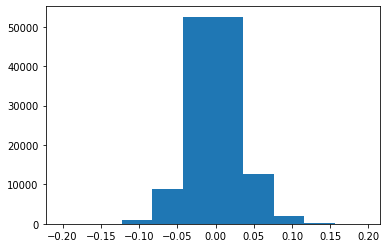

In [46]:
lrHistogram = histogram(lrDifference)
plt.show(lrHistogram)

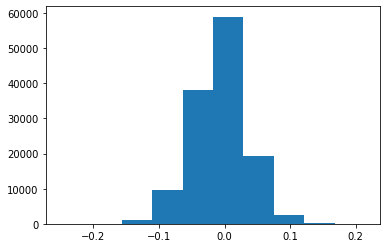

In [47]:
dtHistogram = histogram(dtDifference)
plt.show(dtHistogram)

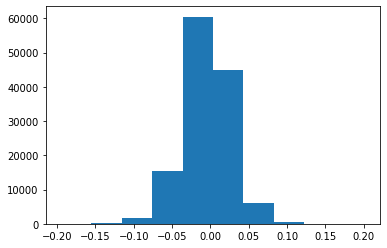

In [48]:
xgbHistogram = histogram(xgbDifference)
plt.show(xgbHistogram)

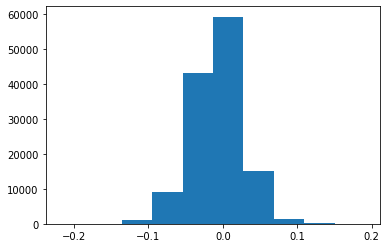

In [49]:
rfHistogram = histogram(rfDifference)
plt.show(rfHistogram)